In [ ]:
'''
앞서 다뤘던 결정 트리는 과대적합의 문제점을 가지고 있었습니다. 이에 대한 대안이 앙상블입니다.
앙상블은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다. 크게 랜덤 포레스트와 그레이던트 부스팅이 있습니다.

랜덤포레스트부터 살펴보도록 하겠습니다. 랜덤포레스트는 여러 결정 트리의 묶음입니다. 각각의 트리의 결과를 평균냄으로써 과대적합을
줄일 수 있습니다. 트리를 랜덤하게 만드는 방법은 데이터 포인트를 무작위로 선택하거나 특성을 무작위로 선택하는 방법이 있습니다.
이에 대해 자세히 알아보도록 하겠습니다.
'''

In [ ]:
'''
랜덤 포레스트를 만들려면 생성할 트리의 개수를 정해야 합니다. 트리들은 완전히 독립적으로 만들어져야 하므로 우선 데이터의 부트스트랩 
샘플을 만듭니다. 이는 n개의 데이터 포인트 중 무작위로 n개의 데이터를 중복을 허용해서 추출하는 것입니다. 이렇게 결정트리를 만들면 
기존과 다른 점이 있습니다. 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고, 알고리즘이 각 노드에서 후보 특성을
무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는 것입니다. 이러한 각각의 트리의 결과를 평균해서 최종 예측이 진행됩니다. 
'''

In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

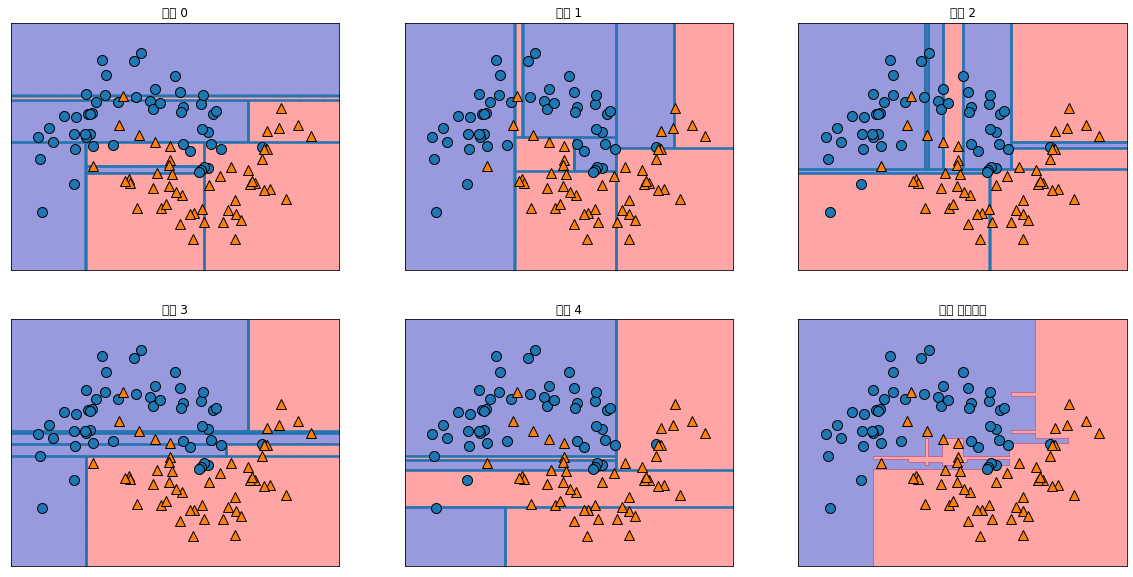

In [5]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("{:.3f}".format(forest.score(X_train, y_train)))
print("{:.3f}".format(forest.score(X_test, y_test)))

1.000
0.972


In [ ]:
'''
랜덤 포레스트는 단일 트리의 단점을 보완하면서 장점을 그래로 가지고 있는 모델입니다. 하지만 텍스트 데이터와 같이 차원이 높고
희소한 데이터에는 잘 작동하지 않습니다. 이런 데이터에는 선형 모델이 적합합니다. 
랜덤 포레스트는 메모리를 사용하고 속도가 느리므로, 속도와 메모리에 제약이 있는 애플리케이션이라면 선형모델이 적합합니다.
'''

In [ ]:
'''
앙상블의 또다른 하나는 그래디언트 부스팅 회귀 트리입니다.
그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만들고 무작위성이 없습니다.
각 트리마다 깊이가 1~5 사이이므로 메모리를 적게 사용하고 속도도 빠릅니다. 
이러한 얕은 트리들을 약한 학습기(weak learner)라고 하는데 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행하므로
이러한 약한 학습기의 수가 증가할수록 성능이 좋아집니다.
그래디언트 부스팅에는 learning_rate라는 매개변수가 있는데 이는 오차를 얼마나 강하게 보정할 것인지를 제어합니다. 
'''

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("{:.3f}".format(gbrt.score(X_train, y_train)))
print("{:.3f}".format(gbrt.score(X_test, y_test)))

1.000
0.965


In [16]:
##훈련 세트에 대해서 100%가 나왔으므로 과대적합인 것을 알 수 있습니다. 따라서 깊이나 학습률을 조절하면 다음과 같습니다.
gbrt = GradientBoostingClassifier(max_depth = 1, random_state = 0)
gbrt.fit(X_train, y_train)

print("{:.3f}".format(gbrt.score(X_train, y_train)))
print("{:.3f}".format(gbrt.score(X_test, y_test)))

print("\n")

gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("{:.3f}".format(gbrt.score(X_train, y_train)))
print("{:.3f}".format(gbrt.score(X_test, y_test)))

0.991
0.972


0.988
0.965


In [18]:
##모델의 복잡도를 감소시켰으므로 둘다 훈련세트의 정확도가 낮아졌습니다.
##이 경우는 학습률 보다는 깊이를 변화시키는 것이 모델 성능 향상에 더 기여하였음을 알 수 있습니다.

In [ ]:
'''
그래디언ㅌ 부스팅은 매개변수를 잘 조정해야하고, 훈련 시간이 길다는 단점이 있습니다. 또한 희소한 고차원 데이터에서 잘 작동하지 않습니다.
n_estimators 와 learning_rate는 깊게 연관되어있는데 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해 n_estimators를 증가해야
합니다. 일반적으로는 메모리와 시간 한도에서 n_estimators를 맞추고 그 후 learning_rate를 찾습니다.
'''